In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse
import datetime
from datetime import datetime
import pytz
from dateutil.tz import tzutc, tzlocal

In [2]:
# dataframe 속에 시간 항목을 datetime 데이터형으로 바꿔서 저장하는 함수
def time_maker(df_name):
    count = 0

    for i, dtitem in enumerate(df_name['datetime']):
        try:
            del_t = datetime.timedelta(seconds=3600 * 9) #한국시간 이랑 미국 시간 차이 -> 9시간
            print("del_t:"+ del_t)
            print(type(del_t))
            df_name['datetime'][i] = parse(dtitem) + del_t
            print(df_name['datetime'][i])
        except:
            if str(dtitem).lower() == 'nan':
                df_name['datetime'][i] = 0
            else:
                count += 1
    
    if count:
        print(count)
    else:
        print('success')

def time_maker_pytz(df_name):
    count = 0
    
    for i, dtitem in enumerate(df_name['datetime']):
        try:
            naive_date = parse(dtitem)
            print("naive_date:" + naive_date)
            localtz = pytz.timezone('Asia/Seoul')
            date_aware_seoul = localtz.localize(naive_date)
            print(date_aware_seoul)
            df_name['datetime'][i] = date_aware_seoul
        except:
            if str(dtitem).lower() == 'nan':
                df_name['datetime'][i] = 0
            else:
                count += 1
                
    if count:
        print(count)
    else:
        print('success')
                
# naive_date = datetime.datetime.strptime("2013-10-21 08:44:08", "%Y-%m-%d %H:%M:%S")
# localtz = pytz.timezone('America/Los_Angeles')
# date_aware_la = localtz.localize(naive_date)
# print(date_aware_la)   # 2013-10-21 08:44:08-07:00
    
# str 속성을 가진 정수를 int 속성으로 바꾸는 함수
def int_maker(df_name, col_name):
    count = 0
    
    for i, dtitem in enumerate(df_name[col_name]):
        try:
            df_name[col_name][i] = int(dtitem.replace(',', ''))
        except:
            if str(dtitem).lower() == 'nan':
                df_name[col_name][i] = int(0)
            else:
                count += 1
    
    if count:
        print(count)

In [3]:
path = './dataset/instagram_몽로.csv'

In [4]:
# 몽로 수요미식회 방송일자
bc_time = parse('2016.01.20')

In [5]:
#Mongro analysis
f_name = 'mongro' # tag:빈도수 사전을 저장할 파일명(dataset마다 바꿀 것)
data_mongro = pd.read_csv(path)
df = data_mongro

In [6]:
df
# df.find('BVNLpAWlt0d')
type(df['datetime'][1])

str

In [7]:
time_maker_pytz(df)

2634


In [15]:
df

,uid,datetime,likes,location,account,tags,comments,weekday
0,BVFEvxihvk6,2017-06-08T12:53:12.000Z,226,421220642$로칸다 몽로,miel_jade,#belgium#beer#몽로#서교동그으길#빵요정아지트,<^miel_jade>$.오늘은 오랜만에 동네시찰몽로의 부분과 같은 오빠랑 달콤이 ...,3
1,BVCkuTdFkV2,2017-06-07T13:34:54.000Z,102,421220642$로칸다 몽로,ho.chi_,#로칸다몽로,<^ho.chi_>$아 저소스 마약인듯 #로칸다몽로<^5gyomi>$나좀 데려가주겟...,2
2,BVHzfNqlGkR,2017-06-09T14:20:07.000Z,28,421220642$로칸다 몽로,merci_unni,NaN,<^merci_unni>$.다이어트가 다 뭐다냐-대동강 맥주와 닭튀김에 무너진 내 ...,4
3,-KtnFjDm7r,2015-11-17T01:24:25.000Z,432,421220642$로칸다 몽로,powerblog,#로칸다몽로#박찬일#박찬일셰프,<^powerblog>$박찬일 셰프님과의 만남날카로운 통찰력과 논리적인 사고후배들에...,0
4,BRfotv9h1ZT,2017-03-11T10:22:10.000Z,138,421220642$로칸다 몽로,eunnarae_cho,#로칸다몽로#용자매,<^eunnarae_cho>$다이어트는 쓰레기통에 던져넣겠어 ! #로칸다몽로 #용자...,5
5,BUdE1pkl7Jp,2017-05-24T00:04:23.000Z,116,421220642$로칸다 몽로,tab_stagram,#instadaily#먹스타그램#로칸다몽로#합정맛집,<^tab_stagram>$.와인 수다 삼매경혜지 축하해🙈💕#instadaily...,1
6,BRDw15ol5_M,2017-02-28T14:34:27.000Z,320,421220642$로칸다 몽로,danielaugustusc,NaN,<^danielaugustusc>$오랜만에 몽로 with @sshinjung<^pr...,1
7,BCHucAvvaPU,2016-02-23T07:39:30.000Z,152,421220642$로칸다 몽로,yoki_guo,NaN,<^yoki_guo>$올~~여기 치킨이랑와인 넘넘 어울린데? 짱<^james_bon...,0
8,BUG1qCUBHex,2017-05-15T08:48:26.000Z,114,421220642$로칸다 몽로,fitness_been,#헬요일#1차전#로칸다몽로#베이글남,<^fitness_been>$어딜가든지치킨앤맥주😌#헬요일 #1차전 #로칸다몽로<^...,6
9,BVNLpAWlt0d,2017-06-11T16:27:22.000Z,20,421220642$로칸다 몽로,youthloveit,#살치살#스테이크#시어링#마늘#버터#로즈마리#steak#searing#garlic#...,<^youthloveit>$지금 시간에 이 사진을보니 소리가 듣고싶다👂🏻<^yo...,6


In [35]:
#sorting datetime
# sorted_df = df.sort_values(by='datetime', ascending=0)
# sorted_df

In [120]:
# sorted_df['datetime'][0]

'2017-06-08T12:53:12.000Z'

In [36]:
df['datetime'][0]

'2017-06-08T12:53:12.000Z'

In [37]:
time_maker_pytz(sorted_df)

2636


In [16]:
# converting datetime to local time(seoul) and add in new column (weekday)
localtz = pytz.timezone('Asia/Seoul')
df['weekday'] = np.zeros_like(df['datetime'])
for i, itm in enumerate(df['datetime']):
    try:
        a = itm[:-5]
        titem = parse(a)
        date_item = localtz.localize(titem)
        utc_date = date_item.astimezone(pytz.utc)
        df['weekday'][i] = utc_date.weekday()
        print(df['weekday'][i])
    except:
        pass

3
2
4
0
5
1
1
0
6
6
5
4
3
2
2
2
2
1
1
1
1
0
0
0
0
6
4
4
4
4
4
2
1
1
0
5
5
4
3
3
2
2
2
0
0
0
4
6
6
5
5
4
4
4
2
1
1
0
6
0
6
5
5
5
5
4
4
4
4
4
4
4
4
4
3
3
2
2
2
1
1
1
1
1
1
0
0
5
5
4
4
4
4
4
4
3
3
3
3
3
3
1
6
5
5
5
4
4
4
3
3
3
3
3
3
2
2
2
1
0
6
6
5
5
4
3
1
1
0
6
5
5
5
4
3
3
3
2
1
1
5
5
5
5
5
4
4
4
3
2
1
1
1
1
1
0
0
0
6
5
5
5
5
5
5
5
4
4
3
3
2
2
2
1
1
1
0
0
0
0
5
5
5
4
4
4
4
3
3
2
2
2
1
1
1
1
0
0
5
5
5
5
5
5
4
4
4
4
3
3
3
1
1
1
1
1
1
1
1
1
0
6
5
5
5
5
5
5
4
4
4
4
4
4
4
4
3
3
3
3
3
2
2
2
2
0
0
0
0
6
6
6
6
6
6
6
5
5
5
5
4
4
4
4
4
4
4
4
4
4
3
3
2
2
2
2
2
2
2
2
1
1
1
1
1
5
5
5
4
4
4
3
2
2
2
2
2
2
1
1
6
6
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
2
2
2
2
1
1
1
0
6
6
6
6
3
3
2
2
2
1
1
1
1
1
0
0
0
0
5
5
5
5
5
4
4
3
3
2
1
6
6
6
6
5
5
3
3
3
3
2
1
1
1
6
6
5
5
5
5
5
4
4
4
4
3
2
2
2
2
2
2
0
0
6
5
4
4
4
4
4
3
3
2
2
2
2
1
1
0
0
5
5
5
5
5
4
4
2
2
2
2
6
5
5
5
5
5
3
3
3
3
2
2
1
1
1
1
1
1
1
1
6
6
5
4
4
3
3
3
1
1
1
0
5
5
3
3
2
1
1
5
5
5
5
5
5
5
4
4
4
3
2
1
1
0
5
5
4
4
4
2
2
2
2
1
0
5
4
4
4
3
3
3
3
2
1
0
0
0
0
6
5
5


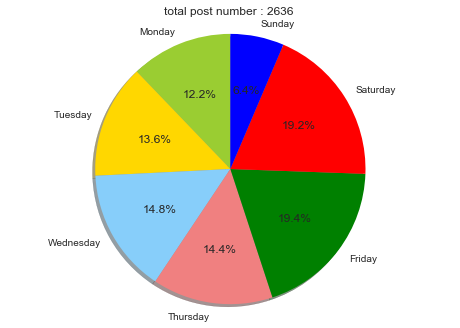

In [22]:
#counting weekday by days
#  {0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일}
labels = u'Monday', u'Tuesday', u'Wednesday', u'Thursday', u'Friday', u'Saturday', u'Sunday'
count_total = df['uid'].count()
#counting each days
count_days = [0, 0, 0, 0, 0, 0, 0]
m = 0
tu = 0
w = 0
th = 0
f = 0
sa = 0
su = 0

for i in df['weekday']:
    if i == 0:
        m += 1
    elif i == 1:
        tu += 1
    elif i == 2:
        w += 1
    elif i == 3:
        th += 1
    elif i == 4:
        f += 1
    elif i == 5:
        sa += 1
    elif i == 6:
        su += 1
        
    count_days[0] = m
    count_days[1] = tu
    count_days[2] = w
    count_days[3] = th
    count_days[4] = f
    count_days[5] = sa
    count_days[6] = su
        

#
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'green', 'red', 'blue']
explode = (0, 0, 0, 0, 0, 0, 0)
plt.pie(count_days, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('total post number : %s ' % count_total)
plt.axis('equal')
plt.show()

In [24]:
#타임존 변환 샘플코드
naive_date = parse('2017-06-08T03:53:12')
print(naive_date)
print(naive_date.weekday())

localtz = pytz.timezone('Asia/Seoul')
date_aware_seoul = localtz.localize(naive_date)
print(date_aware_seoul)

utc_date = date_aware_seoul.astimezone(pytz.utc)
print(utc_date)
print(utc_date.weekday())

2017-06-08 03:53:12
3
2017-06-08 03:53:12+09:00
2017-06-07 18:53:12+00:00
2


In [26]:
#현재시간 타임존에 따라서 출력하는 샘플
utc = datetime.now(tzutc())
print('UTC:   ' + str(utc))

local = utc.astimezone(tzlocal())
print('Local: ' + str(local))

UTC:   2017-06-15 01:51:23.527092+00:00
Local: 2017-06-15 10:51:23.527092+09:00


In [78]:
df.head()

,uid,datetime,likes,location,account,tags,comments,weekday,hour
0,BVFEvxihvk6,2017-06-08T12:53:12.000Z,226,421220642$로칸다 몽로,miel_jade,#belgium#beer#몽로#서교동그으길#빵요정아지트,<^miel_jade>$.오늘은 오랜만에 동네시찰몽로의 부분과 같은 오빠랑 달콤이 ...,3,3
1,BVCkuTdFkV2,2017-06-07T13:34:54.000Z,102,421220642$로칸다 몽로,ho.chi_,#로칸다몽로,<^ho.chi_>$아 저소스 마약인듯 #로칸다몽로<^5gyomi>$나좀 데려가주겟...,2,4
2,BVHzfNqlGkR,2017-06-09T14:20:07.000Z,28,421220642$로칸다 몽로,merci_unni,NaN,<^merci_unni>$.다이어트가 다 뭐다냐-대동강 맥주와 닭튀김에 무너진 내 ...,4,5
3,-KtnFjDm7r,2015-11-17T01:24:25.000Z,432,421220642$로칸다 몽로,powerblog,#로칸다몽로#박찬일#박찬일셰프,<^powerblog>$박찬일 셰프님과의 만남날카로운 통찰력과 논리적인 사고후배들에...,0,16
4,BRfotv9h1ZT,2017-03-11T10:22:10.000Z,138,421220642$로칸다 몽로,eunnarae_cho,#로칸다몽로#용자매,<^eunnarae_cho>$다이어트는 쓰레기통에 던져넣겠어 ! #로칸다몽로 #용자...,5,1


In [53]:
utc = datetime.now(tzutc())
print('UTC:   ' + str(utc))

local = utc.astimezone(tzlocal())
print(type(local))
print('Local: ' + str(local))
local.hour

UTC:   2017-06-15 02:05:52.922393+00:00
<type 'datetime.datetime'>
Local: 2017-06-15 11:05:52.922393+09:00


11

In [137]:
# 로컬 시간으로 변경 후 hour 기준으로 나누기
# converting datetime to local time(seoul) and add in new column (hour)
instatz = pytz.utc
localtz = pytz.timezone('Asia/Seoul')
df['hour'] = np.zeros_like(df['datetime'])
for i, itm in enumerate(df['datetime']):
    try:
#         a = itm[:-5]
#         print(a)
        front = itm[:10]
        back = itm[11:-5]
        total = front + ' ' + back
        print(total)
        titem = parse(total)
#         print(titem)
#        print(type(titem))
#         print(titem.hour)
#         date_item = localtz.localize(titem)
#         utc_date = date_item.astimezone(pytz.utc)        
        date_item = instatz.localize(titem) # 지금 우리는 utc 시간대다       
        seoul_date = date_item.astimezone(localtz) # utc시간대에서 지금 우리는 seoul시간이다
#         print(utc_date)
#         print(utc_date.hour)
        df['hour'][i] = seoul_date.hour
        print(df['hour'][i])
    except:
        pass

2017-06-08 12:53:12
21
2017-06-07 13:34:54
22
2017-06-09 14:20:07
23
2015-11-17 01:24:25
10
2017-03-11 10:22:10
19
2017-05-24 00:04:23
9
2017-02-28 14:34:27
23
2016-02-23 07:39:30
16
2017-05-15 08:48:26
17
2017-06-11 16:27:22
1
2017-06-10 12:06:58
21
2017-06-09 10:59:57
19
2017-06-08 14:35:54
23
2017-06-08 00:22:39
9
2017-06-07 14:16:45
23
2017-06-07 13:58:29
22
2017-06-07 12:15:01
21
2017-06-07 02:10:47
11
2017-06-06 17:29:55
2
2017-06-06 16:32:34
1
2017-06-06 14:14:05
23
2017-06-06 08:42:26
17
2017-06-06 08:39:53
17
2017-06-05 17:38:29
2
2017-06-05 10:31:48
19
2017-06-04 12:55:42
21
2017-06-02 21:45:01
6
2017-06-02 17:33:40
2
2017-06-02 15:35:55
0
2017-06-02 15:20:54
0
2017-06-02 12:28:54
21
2017-05-31 12:47:54
21
2017-05-31 08:35:01
17
2017-05-30 13:28:17
22
2017-05-29 09:02:15
18
2017-05-28 07:32:12
16
2017-05-27 18:19:01
3
2017-05-26 23:23:43
8
2017-05-25 12:19:38
21
2017-05-25 11:35:26
20
2017-05-25 08:21:02
17
2017-05-24 14:13:23
23
2017-05-24 11:52:12
20
2017-05-22 14:56:20
23


In [138]:
df.head()

,uid,datetime,likes,location,account,tags,comments,weekday,hour
0,BVFEvxihvk6,2017-06-08T12:53:12.000Z,226,421220642$로칸다 몽로,miel_jade,#belgium#beer#몽로#서교동그으길#빵요정아지트,<^miel_jade>$.오늘은 오랜만에 동네시찰몽로의 부분과 같은 오빠랑 달콤이 ...,3,21
1,BVCkuTdFkV2,2017-06-07T13:34:54.000Z,102,421220642$로칸다 몽로,ho.chi_,#로칸다몽로,<^ho.chi_>$아 저소스 마약인듯 #로칸다몽로<^5gyomi>$나좀 데려가주겟...,2,22
2,BVHzfNqlGkR,2017-06-09T14:20:07.000Z,28,421220642$로칸다 몽로,merci_unni,NaN,<^merci_unni>$.다이어트가 다 뭐다냐-대동강 맥주와 닭튀김에 무너진 내 ...,4,23
3,-KtnFjDm7r,2015-11-17T01:24:25.000Z,432,421220642$로칸다 몽로,powerblog,#로칸다몽로#박찬일#박찬일셰프,<^powerblog>$박찬일 셰프님과의 만남날카로운 통찰력과 논리적인 사고후배들에...,0,10
4,BRfotv9h1ZT,2017-03-11T10:22:10.000Z,138,421220642$로칸다 몽로,eunnarae_cho,#로칸다몽로#용자매,<^eunnarae_cho>$다이어트는 쓰레기통에 던져넣겠어 ! #로칸다몽로 #용자...,5,19


In [139]:
# heatmap을 위한 데이터 테이블 정리
df_size = df.pivot_table(index="weekday", columns = "hour", aggfunc="size")
df_size

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,34.0,6.0,12.0,2.0,4.0,2.0,NaN,2.0,12.0,4.0,...,4.0,8.0,14.0,16.0,6.0,17.0,54.0,34.0,23.0,54.0
1,20.0,12.0,4.0,2.0,NaN,NaN,NaN,4.0,6.0,4.0,...,NaN,6.0,16.0,12.0,19.0,31.0,36.0,51.0,42.0,69.0
2,14.0,8.0,11.0,2.0,NaN,NaN,4.0,2.0,6.0,14.0,...,NaN,6.0,4.0,12.0,16.0,19.0,61.0,56.0,44.0,82.0
3,32.0,8.0,4.0,2.0,2.0,NaN,NaN,2.0,6.0,8.0,...,10.0,6.0,14.0,4.0,39.0,18.0,40.0,42.0,54.0,42.0
4,44.0,38.0,22.0,NaN,NaN,NaN,8.0,NaN,12.0,4.0,...,18.0,10.0,12.0,8.0,15.0,22.0,57.0,80.0,56.0,73.0
5,30.0,30.0,12.0,4.0,2.0,3.0,2.0,NaN,8.0,10.0,...,10.0,8.0,8.0,8.0,22.0,48.0,70.0,69.0,59.0,52.0
6,16.0,12.0,6.0,2.0,4.0,NaN,NaN,NaN,6.0,NaN,...,4.0,4.0,4.0,10.0,18.0,6.0,12.0,30.0,21.0,8.0


In [140]:
#converting NaN -> 0  
print(df_size.iloc[1,20])
print(np.isnan(df_size.iloc[1,20]))
print(type(df_size.iloc[1,20]))

for i in range(7):
    for j in range(24):
        if (np.isnan(df_size.iloc[i,j])):
            df_size.iloc[i,j] = 0

36.0
False
<type 'numpy.float64'>


In [141]:
df_size

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,34.0,6.0,12.0,2.0,4.0,2.0,0.0,2.0,12.0,4.0,...,4.0,8.0,14.0,16.0,6.0,17.0,54.0,34.0,23.0,54.0
1,20.0,12.0,4.0,2.0,0.0,0.0,0.0,4.0,6.0,4.0,...,0.0,6.0,16.0,12.0,19.0,31.0,36.0,51.0,42.0,69.0
2,14.0,8.0,11.0,2.0,0.0,0.0,4.0,2.0,6.0,14.0,...,0.0,6.0,4.0,12.0,16.0,19.0,61.0,56.0,44.0,82.0
3,32.0,8.0,4.0,2.0,2.0,0.0,0.0,2.0,6.0,8.0,...,10.0,6.0,14.0,4.0,39.0,18.0,40.0,42.0,54.0,42.0
4,44.0,38.0,22.0,0.0,0.0,0.0,8.0,0.0,12.0,4.0,...,18.0,10.0,12.0,8.0,15.0,22.0,57.0,80.0,56.0,73.0
5,30.0,30.0,12.0,4.0,2.0,3.0,2.0,0.0,8.0,10.0,...,10.0,8.0,8.0,8.0,22.0,48.0,70.0,69.0,59.0,52.0
6,16.0,12.0,6.0,2.0,4.0,0.0,0.0,0.0,6.0,0.0,...,4.0,4.0,4.0,10.0,18.0,6.0,12.0,30.0,21.0,8.0


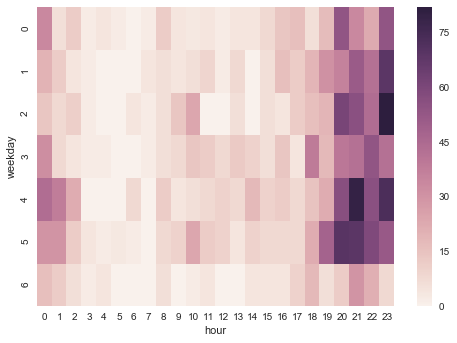

In [142]:
#heatmap 시각화
#  {0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일}
sns.heatmap(df_size)
plt.show()

In [128]:
# sorted_df

In [27]:
# 일자 정리하기 : 한국시간대로 맞춰서 정리
time_maker(sorted_df)

2636


In [29]:
# sorted_df

In [43]:
#시각화 세팅_월별
# sorting by timestamp
# df.sort_values(by='datetime', ascending = False) # recent to old


# lasttime = (data_mongro['datetime'][len(data_mongro['datetime'])-1]) # 포스팅 마지막 시간
# month_rg = pd.date_range(lasttime.strftime("%Y-%m-%d"), data_mongro['datetime'][0].strftime("%Y-%m-%d"), freq = "MS")
# event = (bc_time-lasttime.replace(tzinfo=None)).total_seconds()

# mon_list = []
# for m_item in month_rg:
#     mon_list.append((m_item.replace(tzinfo=None) - lasttime.replace(tzinfo=None)).total_seconds())
# mon_list.append(0)    
# mon_list.append(event)
# mon_list

# mon_name = []
# for m_item in month_rg:
#     mon_name.append(m_item.strftime('%m'))
# mon_name.insert(0, 'st')
# mon_name.append('bc')
# mon_name

datetime.datetime

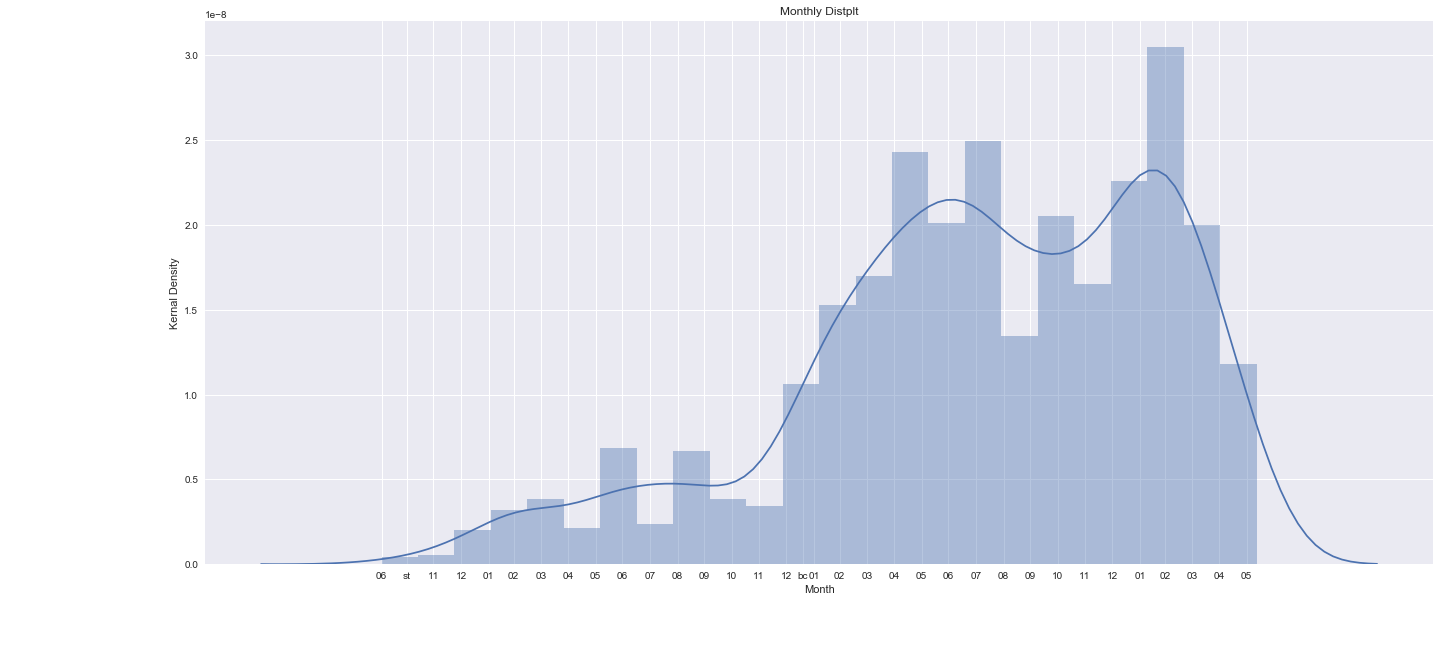

In [29]:
#시각화 testing
# distplot : 월별 포스팅수 datetime/count_uid
t_list = []

len_datetime = len(data_mongro['datetime'])
len_datetime

lasttime = data_mongro['datetime'][len_datetime-1]
lasttime

for dtitem in data_mongro['datetime']:
    try:
        t_list.append((dtitem - lasttime).total_seconds())
    except:
        pass

f1 = plt.figure(figsize=(22,10))
month_rg = pd.date_range(lasttime.strftime("%Y-%m-%d"), data_mongro['datetime'][0].strftime("%Y-%m-%d"), freq = "MS")

gr = sns.distplot(t_list, kde=True)
gr.set(xticks = mon_list, xticklabels = mon_name)
gr.annotate('broad cast', xy = (event, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor = 'black', shrink=0.05),
           )
plt.title("Monthly Distplt")
plt.xlabel("Month")
plt.ylabel("Kernal Density")
plt.show()

In [30]:
#시각화 세팅_요일별
lasttime = (data_mongro['datetime'][len(data_mongro['datetime'])-1])
month_rg = pd.date_range(lasttime.strftime("%Y-%m-%d"), data_mongro['datetime'][0].strftime("%Y-%m-%d"), freq = "MS")
day_rg = pd.date_range(lasttime.strftime("%Y-%m-%d"), data_mongro['datetime'][0].strftime("%Y-%m-%d"), freq = "MS")
event = (bc_time-lasttime.replace(tzinfo=None)).total_seconds()
mon_list = []
for m_item in month_rg:
    mon_list.append((m_item.replace(tzinfo=None) - lasttime.replace(tzinfo=None)).total_seconds())
mon_list.append(0)    
mon_list.append(event)
mon_list

mon_name = []
for m_item in month_rg:
    mon_name.append(m_item.strftime('%m'))
mon_name.insert(0, 'st')
mon_name.append('bc')
mon_name

['st',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 'bc']

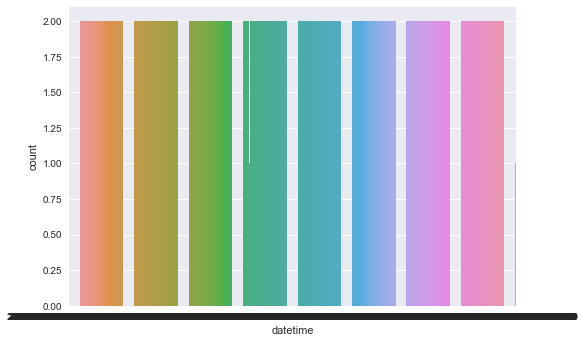

In [27]:
# 일자별 포스팅수 datetime/count_uid (bar plot)
sns.countplot(x="datetime", data=data_mongro)
plt.show()

In [ ]:
# 요일별 plot : 요일별 포스팅수 day/count_uid (pie plot)

In [167]:
# 각 요일별 시간대에 따른 (heatmap plot) : best time people post 
# -> y축 (월화수목금토일), x축(12am-11pm)

In [97]:
fig, axes = plt.subplots(2,1)
data1 = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data1.plot(kind = 'bar', ax=axes[0], color = 'k', alpha=0.7)

In [168]:
tips = sns.load_dataset("tips")

In [169]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [79]:
# labels = u'Monday', u'Tuesday', u'Wednesday', u'Thursday', u'Friday', u'Saturday', u'Sunday'
# sizes = [15, 30, 45, 10, 70, 55, 52]
# colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'green', 'red', 'blue']
# explode = (0, 0, 0, 0, 0.1, 0, 0)
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=90)
# plt.axis('equal')
# plt.show()

In [173]:
titanic = sns.load_dataset("titanic")

In [174]:
titanic_size = titanic.pivot_table(index="class", columns="embark_town", aggfunc="size")
titanic_size

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


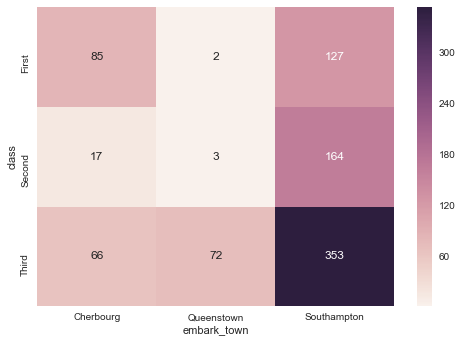

In [179]:
sns.heatmap(titanic_size, annot=True, fmt="d")
plt.show()
flights_passengers = flights.pivot("month", "year", "passengers")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

In [31]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


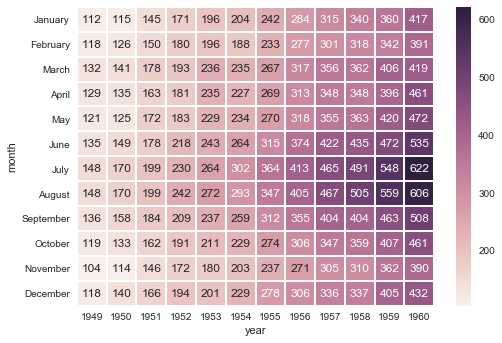

In [177]:
flights_passengers = flights.pivot("month", "year", "passengers")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

In [ ]:
weekday_hour_post = df.pivot("hour","weekday","")